In [161]:
#Import the neccessary Libraries
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

# Deliverable 1::

In [162]:
#Read the data as a dataframe
TermDeposit = pd.read_csv('bank-full.csv')

In [163]:
#Shape of the data
TermDeposit.shape

(45211, 17)

In [164]:
#Data Type of each attribute:Method 1
TermDeposit.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [165]:
#Checking the presence of null values
TermDeposit.isnull().sum()

#Inference: No null/missing values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [166]:
#Look of the data
TermDeposit.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [167]:
#5 Point Summary or descriptive statistics
TermDeposit.describe().T

#Inference: Negative values observed in 'balance' and 'pdays' column

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [168]:
#Checking the presence of negative values in 'balance' column
TermDeposit[TermDeposit['balance']<0]['balance'].count()

#Inference: Average Yearly Balance can't be negative and since the negative values are unique, 
#replacing the negative values with absolute numbers assuming typo error

3766

In [169]:
#Replace the negative values in 'balance' column
TermDeposit['balance'] = TermDeposit['balance'].abs()

#Replacing it with the absolute values

In [170]:
#Checking the presence of negative values in 'pdays' column
TermDeposit[TermDeposit['pdays']<0]['pdays'].count()

#Inference: Here -1 refers to the fact that the customer has not been contacted before and hence retaining the values

36954

In [171]:
#5 Point Summary or descriptive statistics post replacing the negative values in 'balance'
TermDeposit.describe().T


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1415.196081,3020.529906,0.0,137.0,485.0,1436.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [172]:
#To check the data of the Target/Dependent Column
TermDeposit.groupby(["Target"]).count()

#Inference: The 'Target' column is heavily unbalanced with majority having 'no'

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


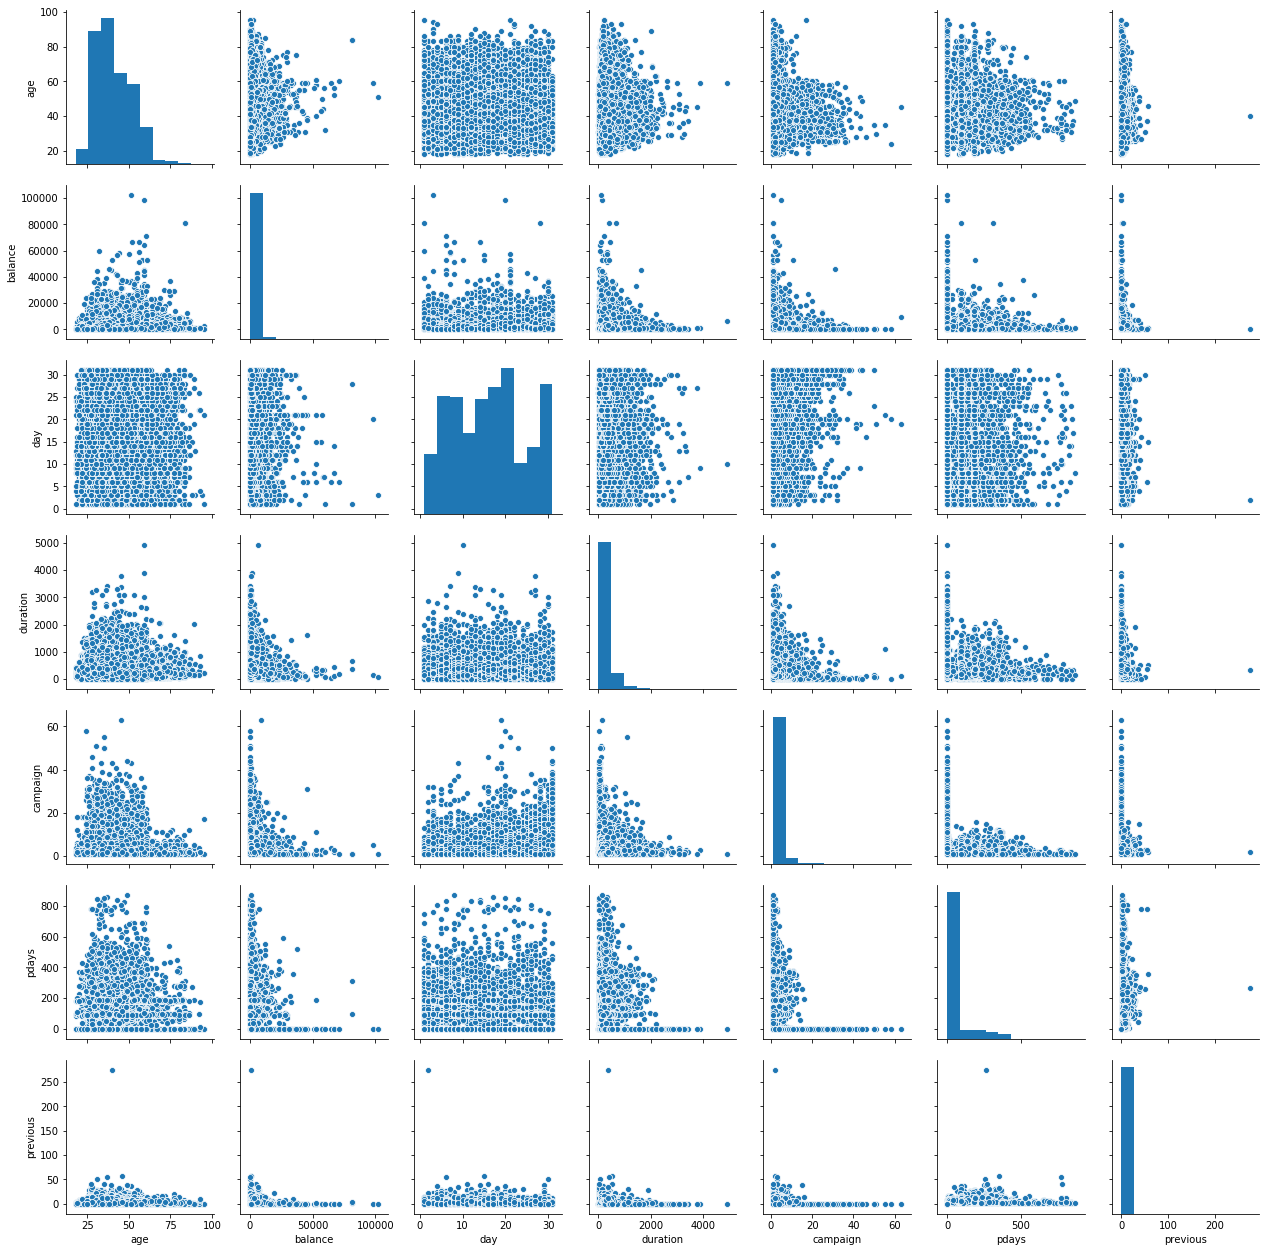

In [173]:
#Distribution of data across columns
sns.pairplot(TermDeposit)

## Inferences from the Data Distribution of each attribute 

1. No linear correlation observed between any 2 columns across all the columns in the dataset
2. 'Age' column seem to be normally distributed
3. Columns such as 'previous', 'pdays', 'campaign', 'duration', 'balance' seem to have outliers and concentrated towards particular point heavily

In [174]:
#Changing the 'Object' Attributes to 'Categorical' attributes
for column in TermDeposit.columns:
    if TermDeposit[column].dtype == 'object':
        TermDeposit[column] = pd.Categorical(TermDeposit[column])

In [175]:
#Data type of each attribute post changing to categorical
TermDeposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


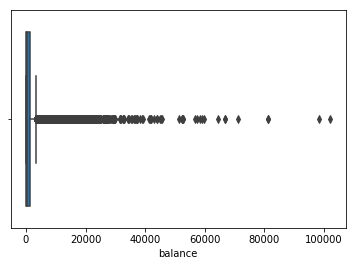

In [176]:
#To check the presence of outliers in 'balance' column based on the Inference from pairplot analysis
sns.boxplot(TermDeposit['balance'])

#Inference: Presence of outliers is observed

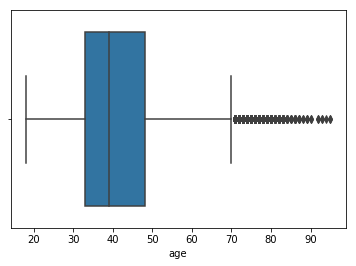

In [177]:
#To check the presence of outliers in 'age' column based on the Inference from pairplot analysis
sns.boxplot(TermDeposit['age'])

#Inference: Presence of outliers is observed

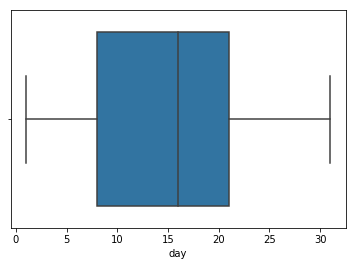

In [178]:
#To check the presence of outliers in 'day' column
sns.boxplot(TermDeposit['day'])

#Inference: Presence of outliers is observed

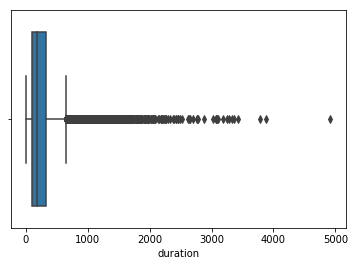

In [179]:
#To check the presence of outliers in 'duration' column
sns.boxplot(TermDeposit['duration'])

#Inference: Presence of outliers is observed

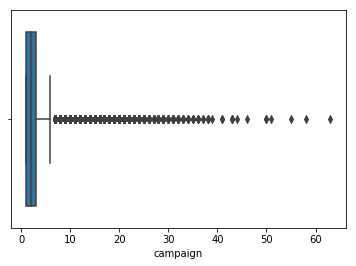

In [180]:
#To check the presence of outliers in 'campaign' column
sns.boxplot(TermDeposit['campaign'])

#Inference: Presence of outliers is observed

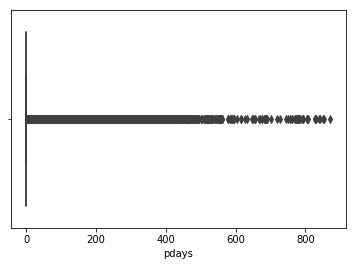

In [181]:
#To check the presence of outliers in 'pdays' column
sns.boxplot(TermDeposit['pdays'])

#Inference: Presence of outliers is observed

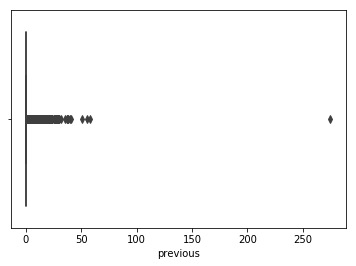

In [182]:
#To check the presence of outliers in 'previous' column
sns.boxplot(TermDeposit['previous'])

#Inference: Presence of outliers is observed

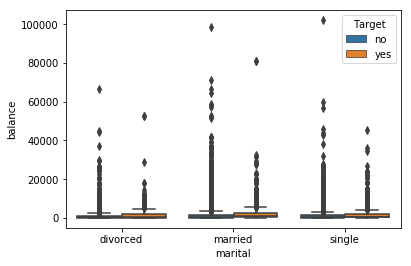

In [183]:
#To check the impact of 'Target' on 'balance' and 'marital'
sns.boxplot(TermDeposit['marital'], TermDeposit['balance'], hue=TermDeposit['Target'])

#Inference: There is no impact on 'Target' column based on 'Marital' and 'balance' columns

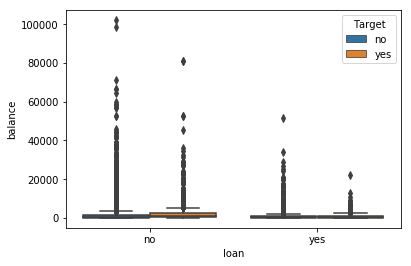

In [184]:
#To check the impact of 'Target' on 'loan' and 'balance'
sns.boxplot(TermDeposit['loan'], TermDeposit['balance'], hue=TermDeposit['Target'])

#Inference: Customers availing loan and low balance have a lower chance to opt for Term Deposit

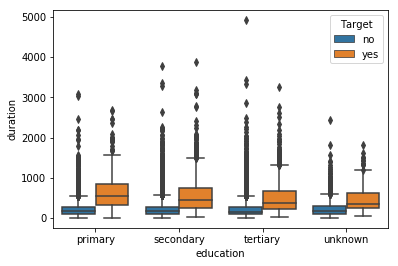

In [185]:
#To check the impact of 'Target' on 'education' and 'duration'
sns.boxplot(TermDeposit['education'], TermDeposit['duration'], hue=TermDeposit['Target'])

#Inference: Customers across all the 'education' columns tend to opt for Term Deposit 'Target' for lower duration

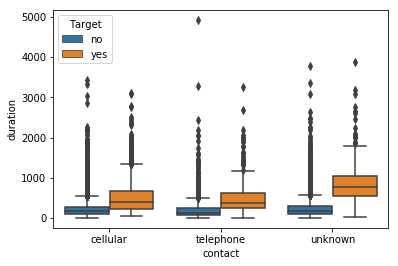

In [186]:
#To check the impact of 'Target' on 'contact' and 'duration'
sns.boxplot(TermDeposit['contact'], TermDeposit['duration'], hue=TermDeposit['Target'])

#Inference: Irrespective of the 'contact' or mode of contact through which the customers have been contaced, chances 
#of opting for Term Deposit is higher whenever the lower duration

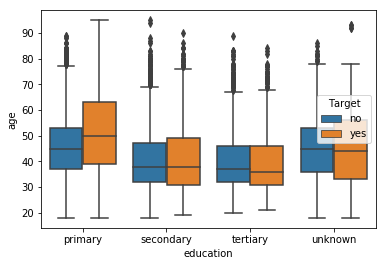

In [187]:
#To check the impact of 'Target' on 'campaign' and 'age'
sns.boxplot(TermDeposit['education'], TermDeposit['age'], hue=TermDeposit['Target'])

#Inference: Customers aged between 30 to 60 across the 'education' levels seem to opt for TermDeposit more likely than
#any other age group 

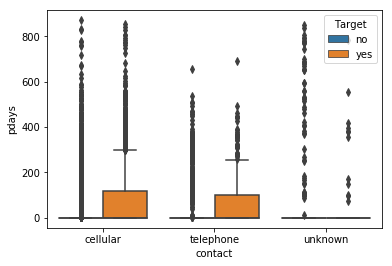

In [188]:
#To check the impact of 'Target' on 'contact' and 'pdays'
sns.boxplot(TermDeposit['contact'], TermDeposit['pdays'], hue=TermDeposit['Target'])

#Inference: Customers who have been contacted for less than 100 'pdays' seem to opt for TermDeposit more likely than
#any other 'pdays'

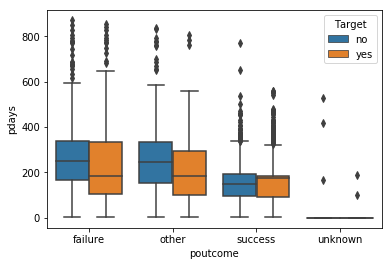

In [189]:
#To check the impact of 'Target' on 'poutcome' and 'pdays'
sns.boxplot(TermDeposit['poutcome'], TermDeposit['pdays'], hue=TermDeposit['Target'])

# Deliverable 2::

In [190]:
#Grouping of Categorical columns such as 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 
#'month', 'poutcome', 'Target'

print(TermDeposit['job'].value_counts())
print(TermDeposit['marital'].value_counts())
print(TermDeposit['education'].value_counts())
print(TermDeposit['default'].value_counts())
print(TermDeposit['housing'].value_counts())
print(TermDeposit['loan'].value_counts())
print(TermDeposit['contact'].value_counts())
print(TermDeposit['month'].value_counts())
print(TermDeposit['poutcome'].value_counts())
print(TermDeposit['Target'].value_counts())

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
no     44396
yes      815
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
no     37967
yes     7244
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64
n

In [191]:
#Replacing the binary columns such as 'default', 'housing', 'loan', 'Target' with 0s and 1s
#One Hot encoding for categorical columns such as 'poutcome', 'month', 'contact', 'education', 'marital', 'job'

replaceBinary = {
    "Target":   {"no": 0, "yes": 1 },
    "loan":      {"no": 0, "yes": 1},
    "default":  {"no": 0, "yes": 1 },
    "housing":  {"no": 0, "yes": 1},
}
oneHotCols=["poutcome","month","contact","education","marital","job"]

In [192]:
#Using functions to replace binary columns and one hot encoding
TermDeposit=TermDeposit.replace(replaceBinary)
TermDeposit=pd.get_dummies(TermDeposit, columns=oneHotCols)

In [193]:
#Data Type post applying one hot encoding 
TermDeposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
age                    45211 non-null int64
default                45211 non-null int64
balance                45211 non-null int64
housing                45211 non-null int64
loan                   45211 non-null int64
day                    45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
Target                 45211 non-null int64
poutcome_failure       45211 non-null uint8
poutcome_other         45211 non-null uint8
poutcome_success       45211 non-null uint8
poutcome_unknown       45211 non-null uint8
month_apr              45211 non-null uint8
month_aug              45211 non-null uint8
month_dec              45211 non-null uint8
month_feb              45211 non-null uint8
month_jan              45211 non-null uint8
month_jul  

In [194]:
#Look of the data
TermDeposit.head(5)

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,1,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,0,0,0,1


In [195]:
#Creating a separate dataframe for independent columns 
TermDeposit_Independent = TermDeposit
TermDeposit_Independent.shape

(45211, 49)

In [196]:
#Removing 'Target' column from Independent columns dataframe
TermDeposit_Independent = TermDeposit_Independent.drop(labels = "Target", axis = 1)

In [197]:
#Checking the shape of the Independent columns data set post removing 'Target' column
TermDeposit_Independent.shape

(45211, 48)

In [198]:
#Creating a separate dataframe for target/dependent column
TermDeposit_target = TermDeposit['Target']

In [199]:
#Checking the shape of Dependent column
TermDeposit_target.shape

(45211,)

In [200]:
#Normalizing the given dataset
TermDeposit_Independent_z = TermDeposit_Independent.apply(zscore)

In [201]:
#5 Point summary of normalized data
TermDeposit_Independent_z.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,5.222844e-16,1.000011,-2.159994,-0.747384,-0.182341,0.665225,5.091402
default,45211.0,4.520540e-15,1.000011,-0.135490,-0.135490,-0.135490,-0.135490,7.380625
balance,45211.0,-2.364546e-15,1.000011,-0.468531,-0.423174,-0.307961,0.006888,33.342798
housing,45211.0,1.382298e-14,1.000011,-1.118674,-1.118674,0.893915,0.893915,0.893915
loan,45211.0,-1.275129e-14,1.000011,-0.436803,-0.436803,-0.436803,-0.436803,2.289359
day,45211.0,-9.219436e-15,1.000011,-1.779108,-0.938003,0.023260,0.624050,1.825628
duration,45211.0,5.560938e-17,1.000011,-1.002478,-0.602517,-0.303517,0.236237,18.094700
campaign,45211.0,1.254699e-14,1.000011,-0.569351,-0.569351,-0.246560,0.076230,19.443647
pdays,45211.0,-1.395817e-13,1.000011,-0.411453,-0.411453,-0.411453,-0.411453,8.297431
previous,45211.0,1.355210e-13,1.000011,-0.251940,-0.251940,-0.251940,-0.251940,119.135982


In [202]:
#Creating Train and Test set from the given dataset
X = np.array(TermDeposit_Independent_z)
y = np.array(TermDeposit_target)

test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random number seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# Deliverable 3:: 

# Building Models using Standard Classification Algorithms

## 1. Applying Logistic regression

In [203]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
#Predicting model score and Confusion matrix
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

/Users/hshanmugavelu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9007667354762607
[[11693   320]
 [ 1026   525]]


In [205]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.612933
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31605
Method:                           MLE   Df Model:                           41
Date:                Fri, 04 Oct 2019   Pseudo R-squ.:                 -0.6878
Time:                        22:07:13   Log-Likelihood:                -19397.
converged:                      False   LL-Null:                       -11493.
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0047      0.016      0.290      0.772      -0.027       0.036
x2            -0.0096      0.012     -0.798      0.425      -0.03

/Users/hshanmugavelu/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


## 2. Applying Naive Bayes

In [206]:
model = GaussianNB()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
0.8528457682099676
[[10791  1222]
 [  774   777]]


## 3. Applying K-Nearest Neighbors (KNN)

In [207]:
#Tuning Hyper parameters for KNN
NNH = KNeighborsClassifier(n_neighbors= 15 , weights = 'distance' )
NNH.fit(X_train, y_train)
predicted_labels = NNH.predict(X_test)
model_score = NNH.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, predicted_labels))

#Inference: Based on the trial and error method of arriving at the 'n_neighbors', increasing beyond 15 didnt show 
#any significant algorithm

0.8970067826599823
[[11738   275]
 [ 1122   429]]


## 4. Applying Support Vector Machines (SVM)

In [208]:
# gamma is a measure of influence of a data point. It is inverse of distance of influence. C is complexity of the model
# lower C value creates simple hyper surface while higher C creates complex surface
clf = svm.SVC(gamma=0.025, C=3)

In [209]:
clf.fit(X_train, y_train)
predicted_labels = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, predicted_labels))

0.904452963727514
[[11617   396]
 [  900   651]]


## Inferences from applying standard classification Algorithm 

1. The model scores of all the standard classification algorithms were approximately 90%

2. Naive Bayes gave the least score of 85%

3. For the above all standard classification algorithms such as Logisitic Regression, SVM, KNN, Naive Bayes, the hyperparameters were tuned (based on trail and error analysis) and the final best fit values have been given for the model

4. Since the model scores are in the range of 90% and since it needs to be improved to 95%, logit function is used to understand the p-values of all the columns with the target variable

5. Since the model scores were same approximately across all the algorithms, there is no point in discussing the adavantages and disdvantages

## 5. Applying Decision Tree Classifier

In [210]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree = dTree.fit(X_train, y_train)
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.8740047183721616


# Deliverable 4:

## 5.1 Regularization of the model

In [211]:
#Reducing over fitting by limiting the number of trees and the leaf
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf=5, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.9005276961481341
0.9019463285166618


## 5.2 Ensemble Learning - Bagging

In [212]:
#Applying Bagging
bgcl = BaggingClassifier(base_estimator=dTreeR, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)
predicted_labels = bgcl.predict(X_test)
model_score = bgcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, predicted_labels))

0.9029047478619876
[[11696   317]
 [ 1000   551]]


## 5.3 Ensemble Learning - AdaBoosting

In [213]:
#Applying AdaBoosting
abcl = AdaBoostClassifier(n_estimators=50, random_state=1)
abcl = abcl.fit(X_train, y_train)
predicted_labels = abcl.predict(X_test)
model_score = abcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, predicted_labels))

0.9015777056915364
[[11642   371]
 [  964   587]]


## 5.4 Ensemble Learning - GradientBoosting

In [214]:
#Applying GradientBoosting
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
predicted_labels = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, predicted_labels))

0.9051164848127397
[[11717   296]
 [  991   560]]


## Building Ensemble Models

## 1. Random Forest

In [215]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=35)
rfcl = rfcl.fit(X_train, y_train)
predicted_labels = rfcl.predict(X_test)
model_score = rfcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, predicted_labels))
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_labels))

0.9072544971984665
[[11556   457]
 [  801   750]]


In [216]:
#scale all the columns 
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
rfcl = RandomForestClassifier(n_estimators = 50, random_state=3,max_features=35)
rfcl = rfcl.fit(X_train_scaled, y_train)
predicted_labels = rfcl.predict(X_test_scaled)
model_score = rfcl.score(X_test_scaled, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, predicted_labels))

0.9065172515482158
[[11551   462]
 [  806   745]]


## Inferences post tuning hyper parameters/Regularisations in Decision Tree

1. Initially, the model score of Decision Tree without tuning hyper parameters resulted in 87% on the test data and 100% on the train data

2. After tuning hyper parameters such as max_depth, min_samples_leaf, model scores of both the train data and test data resulted in 90%

3. There were no considerable increase in the model scores even after applying ensemble learning such as Bagging, AdaBoosting, GradientBoosting 

4. Building Ensemble models such as Random Forest and scaling the dataset didnt improve the model scores to 95% and there was no significant increase in the model score


## Tuning the Dataset and the Machine Learning models to achieve 95% confidence level

## Observations and Inferences
 Since the model accuracy scores are in the range of 90% across the standard classification algorithms and on the Ensemble models, PFB, the steps identified to increase the model efficiency

1.1 Removing 'contact' column as it doesnt add any value to the model building.

1.2 Identifying the importance of 'unknown' values present in 'education' and 'job' columns.

1.3 Removing the presence of outliers across all the numeric columns in trial and error basis to increase the model scores to 95% confident intervals.

1.4 Get the p-values and remove the columns having p-values > 0.05.

## Method 1.1-1.3 on Tuning Machine Learning Models

In [217]:
#Cleaning 'contact' column as it provides no useful information to the model
TermDeposit_Tune = TermDeposit
TermDeposit_Tune = TermDeposit_Tune.drop(labels="contact_cellular", axis = 1)
TermDeposit_Tune = TermDeposit_Tune.drop(labels="contact_telephone", axis = 1)
TermDeposit_Tune = TermDeposit_Tune.drop(labels="contact_unknown", axis = 1)
#TermDeposit_Tune = TermDeposit_Tune.drop(labels="education_unknown", axis = 1)
#TermDeposit_Tune = TermDeposit_Tune.drop(labels="job_unknown", axis = 1)

In [218]:
#Removing the outliers present in 'age' and 'duration' columns after trial & error of outlier removal 
#in various columns present in the dataset
TermDeposit_Tune = TermDeposit_Tune.drop(TermDeposit_Tune[TermDeposit_Tune['age']>70].index, axis = 0)
TermDeposit_Tune = TermDeposit_Tune.drop(TermDeposit_Tune[TermDeposit_Tune['duration']>400].index, axis = 0)


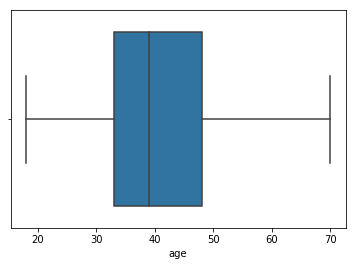

In [219]:
#Checking the box plot of 'age' attribute post removing outliers
sns.boxplot(TermDeposit_Tune["age"])

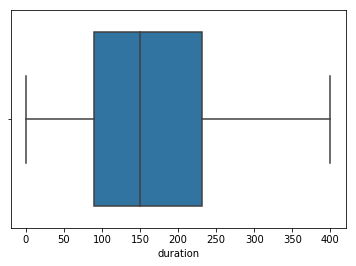

In [220]:
#Checking the box plot of 'duration' attribute post removing outliers
sns.boxplot(TermDeposit_Tune["duration"])

In [221]:
#Create dataframe for independent columns
TermDeposit_Tune_Independent = TermDeposit_Tune

In [222]:
TermDeposit_Tune_Independent.shape

(36993, 46)

In [223]:
#Create dataframe for dependent/Target column
TermDeposit_Tune_Dependent = TermDeposit_Tune["Target"]

In [224]:
#Removing 'target' column from the Independent dataframe
TermDeposit_Tune_Independent = TermDeposit_Tune_Independent.drop(labels = "Target", axis = 1)

In [225]:
#Normalizing the data using z-score
TermDeposit_Tune_Independent_z = TermDeposit_Tune_Independent.apply(zscore)


In [226]:
#Creating Train and Test set
X = np.array(TermDeposit_Tune_Independent_z)
y = np.array(TermDeposit_Tune_Dependent)

test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Reapplying DecisionTrees

In [227]:
#Reducing over fitting by limiting the number of trees
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf=5, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.9463603012164511
0.9479185438817805


In [228]:
#Applying Bagging
bgcl = BaggingClassifier(base_estimator=dTreeR, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)
predicted_labels = bgcl.predict(X_test)
model_score = bgcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, predicted_labels))

0.9486393944854928
[[10324    90]
 [  480   204]]


In [229]:
#Applying AdaBoosting
abcl = AdaBoostClassifier(n_estimators=50, random_state=1)
abcl = abcl.fit(X_train, y_train)
predicted_labels = abcl.predict(X_test)
model_score = abcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, predicted_labels))

0.9463867363488917
[[10276   138]
 [  457   227]]


In [230]:
#Applying GradientBoosting
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
predicted_labels = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, predicted_labels))

0.9491800324382772
[[10316    98]
 [  466   218]]


## Reapplying Logistic Regression

In [241]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
#Predicting model score and Confusion matrix
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_labels))

/Users/hshanmugavelu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.946927374301676
[[10299   115]
 [  474   210]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10414
           1       0.66      0.45      0.53       684

   micro avg       0.95      0.95      0.95     11098
   macro avg       0.81      0.72      0.75     11098
weighted avg       0.95      0.95      0.95     11098



## Rebuilding Ensemble models (RandomForest)

In [240]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=3,max_features=40)
rfcl = rfcl.fit(X_train, y_train)
predicted_labels = rfcl.predict(X_test)
model_score = rfcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, predicted_labels))
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_labels))

0.9518832222021986
[[10259   155]
 [  379   305]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10414
           1       0.66      0.45      0.53       684

   micro avg       0.95      0.95      0.95     11098
   macro avg       0.81      0.72      0.75     11098
weighted avg       0.95      0.95      0.95     11098



## Inferences of machine learning models post removing outliers

1. Post removing 'contact' column and the outliers present in 'duration' and 'age' column, model scores improved to 95% across all the algorithms 

2. Rows with outliers present in 'duration' and 'age' columns were dropped because replacing the outliers with the median values will overrepresent the data with median values creating bias. Hence the rows with outliers were dropped

3. Applying Ensemble models such as RandomForest gave the exact 95% confident interval score and hence achieved the model scores given in the problem statement

4. Based on the previous model executions, standard classification algorithms yield the results in the same way, hence restricted to the Logistic Regression machine learning model while rebuilding the models. However, all the proccesses involved in DecisionTreeClasifier and RandomForest have been executed

5. From the univariate and bivariate analysis, it is understood that the target column is heavily biased with more number of 'no' when compared to that of 'yes', hence the precision and recall metrics reveal the same. Identifying 'no'/'0' correctly (Recall) is done with 99% whereas not identifying 'no'/'0' as 'yes' (Precision) is done with 96%. Recall of identifying 'yes' is 45%

## Method 1.4 on Tuning Machine Learning models

## Priority of the columns based on p-values

In [235]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.653173
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                25895
Model:                          Logit   Df Residuals:                    25855
Method:                           MLE   Df Model:                           39
Date:                Fri, 04 Oct 2019   Pseudo R-squ.:                  -1.725
Time:                        22:21:14   Log-Likelihood:                -16914.
converged:                      False   LL-Null:                       -6206.2
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0096      0.016     -0.598      0.550      -0.041       0.022
x2            -0.0162      0.013     -1.269      0.204      -0.04

/Users/hshanmugavelu/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


From the Logit Regression results, it is understood that only 4 columns have p-value <0.05 and hence removing all the other columns doesnt provide much value to the model. However the model score/efficiency will be improved